# Importing Numpy

In [137]:
import numpy as np
from matplotlib import pyplot as plt

# Creating Input & Output Arrays

In [138]:
X = np.array(([0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]), dtype=float)
y = np.array(([1], [0], [0], [0], [0], [0], [0], [1]), dtype=float)

# Creating the array to be Predicted

In [139]:
xPredicted = np.array(([0, 0, 1]), dtype=float)
X = X/np.amax(X, axis=0)
xPredicted = xPredicted/np.amax(xPredicted, axis=0)

# Creating the File for Losses

In [140]:
lossFile = open("SumSquaredLossList.csv", "w")

# Creating Neural Network Class

In [141]:
class Neural_Network (object):
    def __init__(self):
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def feedForward(self, X):
        self.z = np.dot(X, self.W1)
        self.z2 = self.activationSigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W2)
        out = self.activationSigmoid(self.z3)
        return out

    def backwardPropagate(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error*self.activationSigmoidPrime(o)
        self.z2_error = self.o_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error*self.activationSigmoidPrime(self.z2)
        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)
        
    def trainNetwork(self, X, y):
        o = self.feedForward(X)
        self.backwardPropagate(X, y, o)
    
    def activationSigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def activationSigmoidPrime(self, s):
        return s * (1 - s)
    
    def saveSumSquaredLossList(self,i,error):
        lossFile.write(str(i)+","+str(error.tolist())+'\n')

    def saveWeights(self):
        np.savetxt("weightsLayer1.txt", self.W1, fmt="%s")
        np.savetxt("weightsLayer2.txt", self.W2, fmt="%s")
    
    def predictOutput(self):
        print ("Predicted XOR output data based on trained weights: ")
        print ("Expected (X1-X3): \n" + str(xPredicted))
        print ("Output (Y1): \n" + str(self.feedForward(xPredicted)))

# Training & Printing Output

In [142]:
myNeuralNetwork = Neural_Network()
trainingEpochs = 2001
losses=[]
for i in range(trainingEpochs):
    op=myNeuralNetwork.feedForward(X)
    loss=np.mean(np.square(y - op))
    if i%100==0:
        print ("Epoch # " + str(i) + "\n")
        print ("Output from XOR Gate Neural Network: \n" + str(op))
        print ("Sum Squared Loss: \n" + str(loss))
        print("\n---------------------------------------------------------------")
        print ("\n")
    losses.append(loss)
    myNeuralNetwork.saveSumSquaredLossList(i,loss)
    myNeuralNetwork.trainNetwork(X, y)
print ("Network Input : \n" + str(X))
print ("Expected Output of XOR Gate Neural Network: \n" + str(y))
myNeuralNetwork.saveWeights()
myNeuralNetwork.predictOutput()

Epoch # 0

Output from XOR Gate Neural Network: 
[[0.31754373]
 [0.23432521]
 [0.27695929]
 [0.1941657 ]
 [0.26950119]
 [0.21798384]
 [0.24004382]
 [0.18354928]]
Sum Squared Loss: 
0.18492778774935292

---------------------------------------------------------------


Epoch # 100

Output from XOR Gate Neural Network: 
[[0.41302985]
 [0.21839108]
 [0.19953757]
 [0.14197744]
 [0.30283653]
 [0.25386701]
 [0.22618816]
 [0.22434821]]
Sum Squared Loss: 
0.1576445848293392

---------------------------------------------------------------


Epoch # 200

Output from XOR Gate Neural Network: 
[[0.58841839]
 [0.21930412]
 [0.17382777]
 [0.20660598]
 [0.20485373]
 [0.2230017 ]
 [0.26026125]
 [0.39608079]]
Sum Squared Loss: 
0.10181812384737689

---------------------------------------------------------------


Epoch # 300

Output from XOR Gate Neural Network: 
[[0.74655804]
 [0.16523666]
 [0.07847734]
 [0.16355958]
 [0.14206033]
 [0.09191226]
 [0.18536757]
 [0.68956281]]
Sum Squared Loss: 
0.03547597

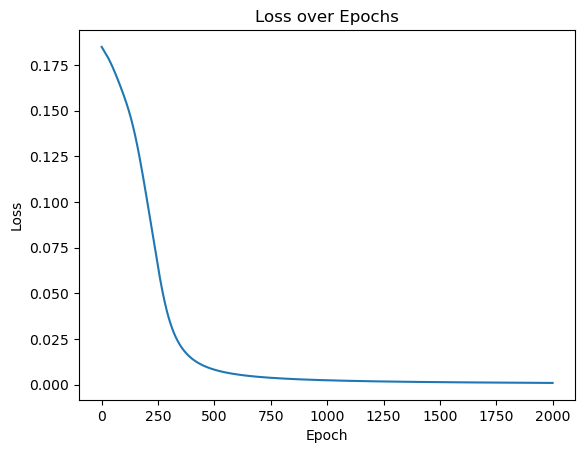

In [143]:
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()